# Goal

This notebook provides an exemplary analysis of the data contained in the `Webis-STEREO-21` dataset on scientific text reuse. The goal is to calculate all the key statistics necessary for the following sentence (taken from the original paper):


> It [the dataset] contains more than 91 million cases of reused passages among 4.2 million unique publications. The cases stem from 46 fields of study, encompassing 14 scientific areas in all four major scientific disciplines, covering over 150~years of scientific publishing between 1860 and 2018.

# Setup

In [1]:
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext

import pandas as pd
import seaborn as sns

In [2]:
# Adapt to your own spark configuration
session = SparkSession.builder.master("yarn").getOrCreate()
# Adapt to your own data path
INPUT = "webis-stereo21/cases-full/*.json.gz"

In [3]:
df = session.read.option("compression", "gzip").json(INPUT)

# Dataset size

In [4]:
# Total number of cases
df.count()

91466374

# Distribution of Disciplines, Areas, and Boards

## Disciplines

In [5]:
# Distribution of disciplines
disciplines = (
    df
    .select(F.explode(F.col("discipline_a")))
    .union(df.select(F.explode(F.col("discipline_b"))))
    .groupBy("col")
    .count()
    .toPandas()
    .rename({"col": "Discipline", "count": "Count"}, axis=1)
)

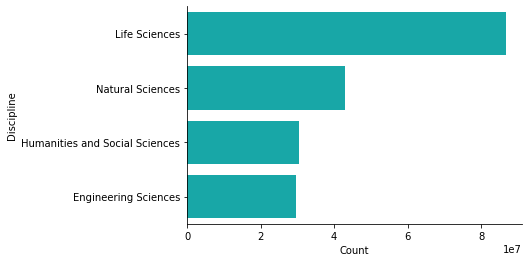

In [6]:
# Discipline plot
ax = sns.barplot(
    x="Count", 
    y="Discipline", 
    data=disciplines.sort_values("Count", ascending=False), 
    color="c"
)
sns.despine()

In [7]:
# Number of unique disciplines
disciplines["Discipline"].nunique()

4

## Areas

In [8]:
# Distribution of areas
areas = (
    df
    .select(F.explode(F.col("area_a")))
    .union(df.select(F.explode(F.col("area_b"))))
    .groupBy("col")
    .count()
    .toPandas()
    .rename({"col": "Area", "count": "Count"}, axis=1)
)


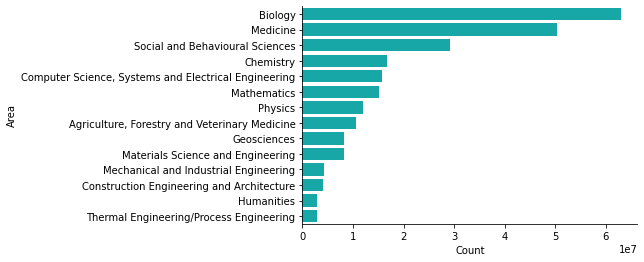

In [ ]:
# Area plot
ax = sns.barplot(
    x="Count", 
    y="Area", 
    data=areas.sort_values("Count", ascending=False), 
    color="c"
)
sns.despine()

In [ ]:
# Number of unique areas
areas["Area"].nunique()

14

## Fields

In [ ]:
# Distribution of boards
boards = (
    df
    .select(F.explode(F.col("field_a")))
    .union(df.select(F.explode(F.col("field_b"))))
    .groupBy("col")
    .count()
    .toPandas()
    .rename({"col": "Field", "count": "Count"}, axis=1)
)

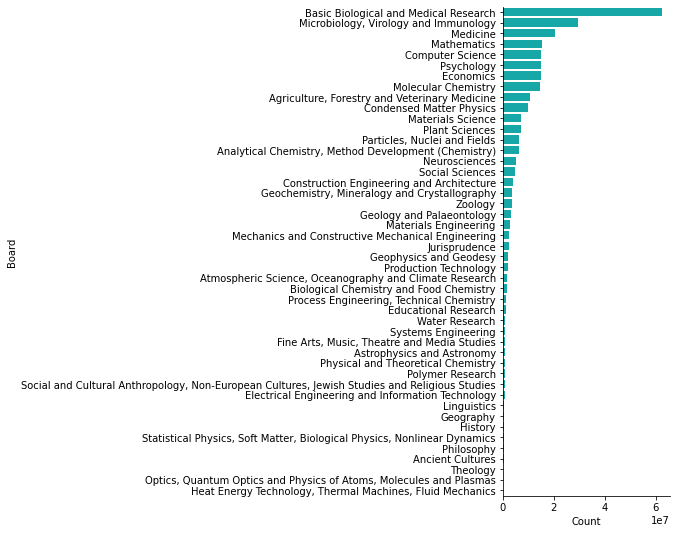

In [ ]:
# Board plot
ax = sns.barplot(
    x="Count", 
    y="Field", 
    data=boards.sort_values("Count", ascending=False), 
    color="c"
)
ax.figure.set_size_inches(3,9)
sns.despine()

In [ ]:
# Number of unique areas
boards["Field"].nunique()

46

# Timespan

In [ ]:
# Distribution over time
years = (
    df
    .select("year_a")
    .union(
        df
        .select("year_b")
    )
    .groupby("year_a")
    .count()
    .toPandas()
    .rename({"year_a": "Year", "count": "Count"}, axis=1)
    .sort_values("Year")
    .dropna()
    .astype({"Year": int, "Count": int})
)

In [ ]:
# Year span
years.Year.min(), years.Year.max()

(1860, 2018)

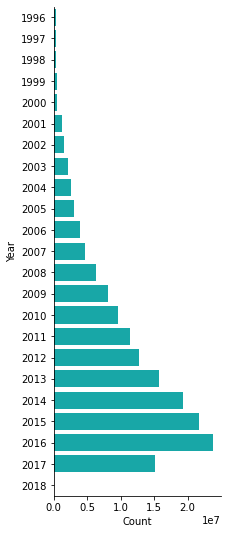

In [ ]:
# Time plot
ax = sns.barplot(
    x="Count", 
    y="Year", 
    data=years[years.Year > 1995].astype({"Year": str, "Count": int}),
    color="c",
)
ax.figure.set_size_inches(3,9)
sns.despine()

In [ ]:
session.stop()